In [2]:
%load_ext watermark
%watermark -a "Romell D.Z." -u -d -p numpy,pandas,matplotlib,keras

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Romell D.Z. 
last updated: 2019-02-22 

numpy 1.16.1
pandas 0.23.4
matplotlib 2.2.2
keras 2.2.4


# 1. Kernels & Convolutions

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
path_photo_a = 'snapshot/teamA.jpg'

In [7]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.models import Model
from keras.preprocessing import image
from keras.optimizers import SGD

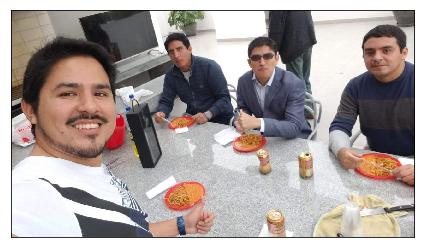

In [8]:
photo_a = image.load_img(path_photo_a)
plt.imshow(photo_a)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

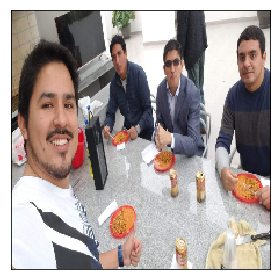

In [9]:
photo_a = image.load_img(path_photo_a,target_size=(224,224))
plt.imshow(photo_a)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [10]:
x = image.img_to_array(photo_a)
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [11]:
type(x)

numpy.ndarray

In [12]:
datagen = image.ImageDataGenerator(featurewise_center=False,
                                  featurewise_std_normalization=False,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True)
datagen.fit(x)

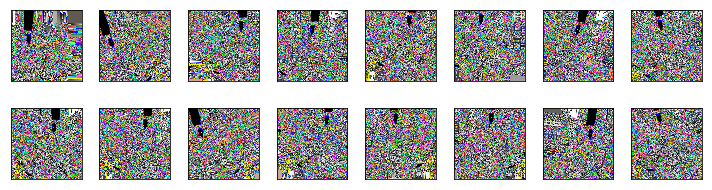

In [13]:
fig, axes = plt.subplots(2, 8, figsize=(10, 3))
axes = np.ravel(axes)
num_augmented = 0
for x_aug in datagen.flow(x, batch_size=1):
    if num_augmented >= 16:
        break
    x_aug = 255 - x_aug
    axes[num_augmented].imshow(x_aug[0], interpolation="nearest")
    axes[num_augmented].set_xticks([])
    axes[num_augmented].set_yticks([])
    num_augmented += 1
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [14]:
from scipy import ndimage
from skimage import color, io
from skimage.measure import block_reduce

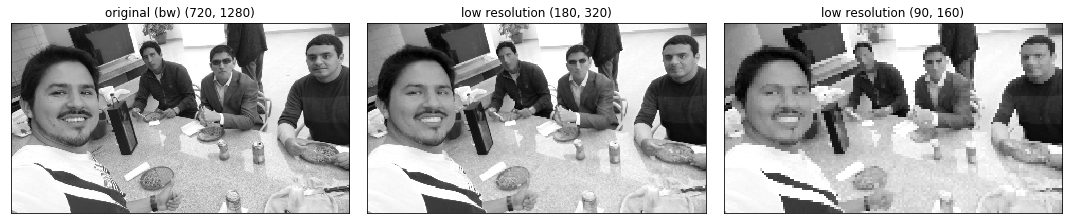

In [15]:
gray_photo_a = color.rgb2gray(io.imread(path_photo_a));
filtered_photo_a = block_reduce(gray_photo_a, block_size=(4, 4), func=np.max);
filtered2_photo_a = block_reduce(gray_photo_a, block_size=(8, 8), func=np.max)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.title("original (bw) {:s}".format(str(gray_photo_a.shape)))
plt.xticks([])
plt.yticks([])
plt.imshow(gray_photo_a, cmap="gray")

plt.subplot(132)
plt.title("low resolution {:s}".format(str(filtered_photo_a.shape)))
plt.xticks([])
plt.yticks([])
plt.imshow(filtered_photo_a, cmap="gray")

plt.subplot(133)
plt.title("low resolution {:s}".format(str(filtered2_photo_a.shape)))
plt.xticks([])
plt.yticks([])
plt.imshow(filtered2_photo_a, cmap="gray")
plt.tight_layout()

plt.savefig('snapshot/reduce_resolution.jpg',bbox_inches='tight')

# Basic Convolutions

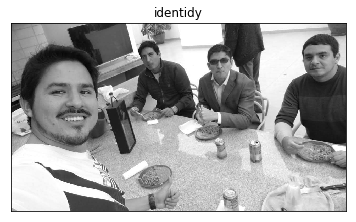

In [16]:
identidy = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])
photo_identidy = ndimage.convolve(gray_photo_a, identidy, mode="constant", cval=0.0)
plt.title("identidy")
plt.imshow(photo_identidy, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.savefig('snapshot/identidy.jpg',bbox_inches='tight')
plt.show()

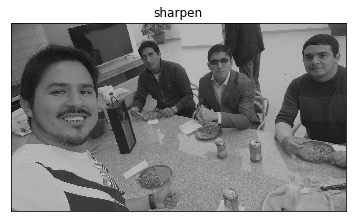

In [17]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, 1],
                    [0, -1, 0]])
photo_sharpen = ndimage.convolve(gray_photo_a, sharpen, mode="constant", cval=0.0)
plt.title("sharpen")
plt.imshow(photo_sharpen, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.savefig('snapshot/sharpen.jpg',bbox_inches='tight')
plt.show()

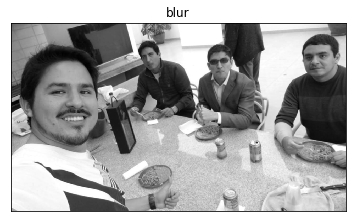

In [19]:
blur = np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]])
photo_blur = ndimage.convolve(gray_photo_a, blur, mode="constant", cval=0.0)
plt.title("blur")
plt.imshow(photo_blur, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

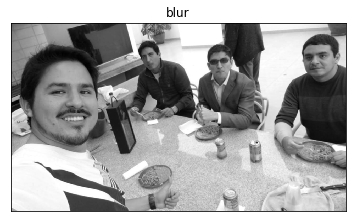

In [20]:
# blur normalized
box_blur = np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]])
box_blur = box_blur / np.sum(box_blur)
photo_box_blur = ndimage.convolve(gray_photo_a, box_blur, mode="constant", cval=0.0)
plt.title("blur")
plt.imshow(photo_box_blur, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

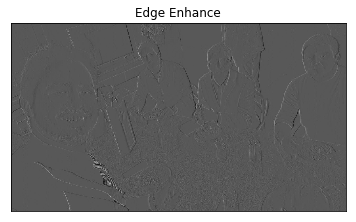

In [21]:
edge_enhance = np.array([[0, 0, 0],
                    [-1, 1, 0],
                    [0, 0, 0]])
photo_edge_enhance = ndimage.convolve(gray_photo_a, edge_enhance, mode="constant", cval=0.0)
plt.title("Edge Enhance")
plt.imshow(photo_edge_enhance, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.savefig('snapshot/Edge Enhance.jpg',bbox_inches='tight')
plt.show()

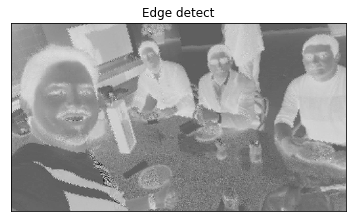

In [22]:
edge_detect = np.array([[-1, -1, -1],
                    [-1, 6, -1],
                    [-1, -1, -1]])
photo_edge_detect = ndimage.convolve(gray_photo_a, edge_detect, cval=0.0)
plt.title("Edge detect")
plt.imshow(photo_edge_detect, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.savefig('snapshot/Edge detect.jpg',bbox_inches='tight')
plt.show()

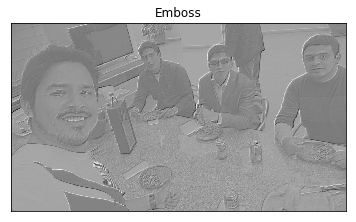

In [23]:
emboss = np.array([[-2, -1, 0],
                    [-1, 1, 1],
                    [0, 1, 2]])
photo_emboss = ndimage.convolve(gray_photo_a, emboss, cval=0.0)
plt.title("Emboss")
plt.imshow(photo_emboss, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.savefig('snapshot/Emboss.jpg',bbox_inches='tight')
plt.show()